In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv
/kaggle/input/00-customer-churn-preprocessing/__results__.html
/kaggle/input/00-customer-churn-preprocessing/__notebook__.ipynb
/kaggle/input/00-customer-churn-preprocessing/__output__.json
/kaggle/input/00-customer-churn-preprocessing/custom.css
/kaggle/input/00-customer-churn-preprocessing/__results___files/__results___11_0.png
/kaggle/input/00-customer-churn-preprocessing/__results___files/__results___17_0.png
/kaggle/input/00-customer-churn-preprocessing/__results___files/__results___18_0.png
/kaggle/input/00-customer-churn-preprocessing/__results___files/__results___7_0.png
/kaggle/input/00-customer-churn-preprocessing/figures/features_1.png
/kaggle/input/00-customer-churn-preprocessing/figures/features_2.png
/kaggle/input/00-customer-churn-preprocessing/figures/churn_dist.png
/kaggle/input/00-customer-churn-preprocessing/figures/features_3.png
/kaggle/input/00-customer-churn-preprocessing/processed/orig.csv
/

In [2]:
!pip install imbalanced-learn

In [3]:
df = pd.read_csv('/kaggle/input/00-customer-churn-preprocessing/processed/processed.csv')
df.head()

,Unnamed: 0,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,0,No phone service,DSL,No,Yes,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,No,No,34,1,No,DSL,Yes,No,Yes,No,One year,0,Mailed check,56.95,1889.50,0
2,2,No,No,2,1,No,DSL,Yes,Yes,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,3,No,No,45,0,No phone service,DSL,Yes,No,Yes,Yes,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,4,No,No,2,1,No,Fiber optic,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [4]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Unnamed: 0,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,29.85,29.85,0,True,False,True,...,True,False,False,False,False,False,False,False,True,False
1,1,34,1,0,56.95,1889.50,0,False,False,False,...,False,False,True,False,False,True,False,False,False,True
2,2,2,1,1,53.85,108.15,1,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,3,45,0,0,42.30,1840.75,0,False,False,True,...,False,False,True,False,True,True,False,False,False,False
4,4,2,1,1,70.70,151.65,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

> **Split the dataset into training and test sets with an 80/20 ratio, ensuring that the target variable’s distribution remains consistent across both sets.**

In [6]:
X = df.drop(['Churn', 'Unnamed: 0'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
print(X_train.shape, X_test.shape)

(5634, 24) (1409, 24)


<h1>Logistic Regression</h1>
<h2>Base model</h2>

In [8]:
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

In [9]:
logreg_pipe.fit(X_train, y_train)

y_pred1 = logreg_pipe.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)

<h2>Balanced class weight</h2>

In [10]:
logreg_bcw_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])

In [11]:
logreg_bcw_pipe.fit(X_train, y_train)

y_pred2 = logreg_bcw_pipe.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)

In [12]:
print("1. Logistic Regression Base Model")
print("-- Classification Report\n")
print(classification_report(y_test, y_pred1, digits=4))
print("-- Confusion Matrix\n", cm1)
print("\n-------\n")
print("2. Logistic Regression Balanced Class Weight")
print("-- Classification Report\n")
print(classification_report(y_test, y_pred2, digits=4))
print("-- Confusion Matrix\n", cm2)

1. Logistic Regression Base Model
-- Classification Report

              precision    recall  f1-score   support

           0     0.8452    0.8918    0.8679      1035
           1     0.6467    0.5481    0.5933       374

    accuracy                         0.8006      1409
   macro avg     0.7460    0.7200    0.7306      1409
weighted avg     0.7925    0.8006    0.7950      1409

-- Confusion Matrix
 [[923 112]
 [169 205]]

-------

2. Logistic Regression Balanced Class Weight
-- Classification Report

              precision    recall  f1-score   support

           0     0.9051    0.7188    0.8013      1035
           1     0.5043    0.7914    0.6160       374

    accuracy                         0.7381      1409
   macro avg     0.7047    0.7551    0.7087      1409
weighted avg     0.7987    0.7381    0.7521      1409

-- Confusion Matrix
 [[744 291]
 [ 78 296]]


<h1>Balancing the Dataset</h1>
<h2> with SMOTE Oversampling</h2>

In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [15]:
smote_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

In [16]:
smote_pipe.fit(X_res, y_res)

y_pred3 = smote_pipe.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)

In [17]:
print("3. Logistic Regression with SMOTE Oversampling")
print("-- Classification Report\n")
print(classification_report(y_test, y_pred3, digits=4))
print("-- Confusion Matrix\n", cm3)

3. Logistic Regression with SMOTE Oversampling
-- Classification Report

              precision    recall  f1-score   support

           0     0.8561    0.7643    0.8076      1035
           1     0.4969    0.6444    0.5611       374

    accuracy                         0.7324      1409
   macro avg     0.6765    0.7043    0.6843      1409
weighted avg     0.7607    0.7324    0.7421      1409

-- Confusion Matrix
 [[791 244]
 [133 241]]


> **Plotted predictions from all three models using heatmaps for comparison**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

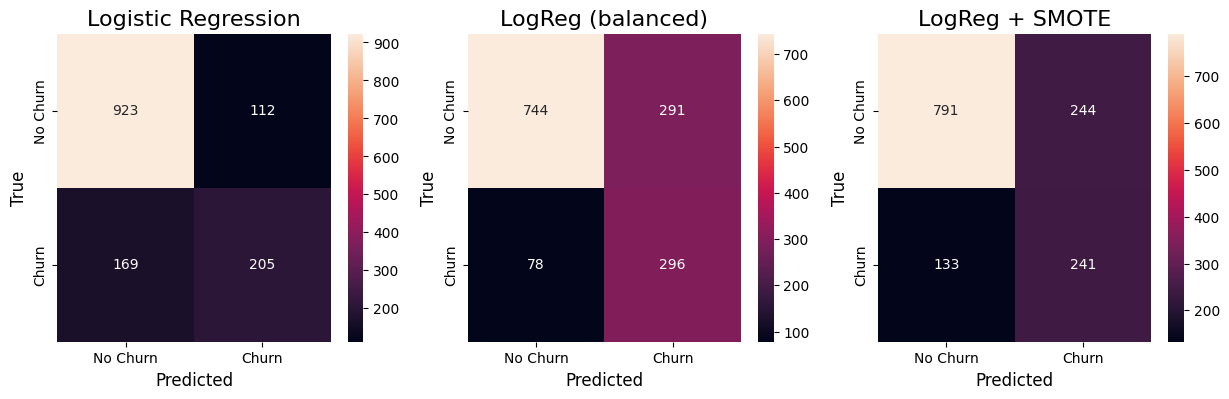

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.heatmap(cm1, ax=axs[0], annot=True, fmt='.0f',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
sns.heatmap(cm2, ax=axs[1], annot=True, fmt='.0f',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
sns.heatmap(cm3, ax=axs[2], annot=True, fmt='.0f',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])

axs[0].set_title("Logistic Regression", fontsize=16)
axs[1].set_title("LogReg (balanced)", fontsize=16)
axs[2].set_title("LogReg + SMOTE", fontsize=16)

for i in range(3):
    axs[i].set_xlabel("Predicted", fontsize=12)
    axs[i].set_ylabel("True", fontsize=12)

fig_title = "heatmap_baseline_models.png"
fig_path = "/kaggle/working/figures/"
os.makedirs(fig_path, exist_ok=True)
fig.savefig(fig_path+fig_title, dpi=200, bbox_inches='tight')
fig.show()

<h1>Impact of Features on Churn</h1>

In [20]:
coef_1 = logreg_pipe.named_steps["clf"].coef_[0]
coef_2 = logreg_bcw_pipe.named_steps["clf"].coef_[0]
coef_3 = smote_pipe.named_steps["clf"].coef_[0]

In [21]:
features_impacts = pd.DataFrame(
    {'LogReg': coef_1, 'LogReg (balanced)': coef_2, 'LogReg (SMOTE)': coef_3},
    index = X_train.columns
)
out_path = '/kaggle/working/outdata/'
os.makedirs(out_path, exist_ok=True)
features_impacts.to_csv(out_path+'combined_feature_impacts.csv')

In [22]:
feat_imp1 = pd.DataFrame({
    'Features': X_train.columns,
    'Coefficients': coef_1
}).sort_values('Coefficients', ascending=False)

feat_imp2 = pd.DataFrame({
    'Features': X_train.columns,
    'Coefficients': coef_2
}).sort_values('Coefficients', ascending=False)

feat_imp3 = pd.DataFrame({
    'Features': X_train.columns,
    'Coefficients': coef_3
}).sort_values('Coefficients', ascending=False)

In [23]:
print("1. Logistic Regression Base Model")
print("-- Top 5 Positive impacts\n")
print(feat_imp1.head(5))
print("-- Top 5 Negative impacts\n")
print(feat_imp1.tail(5))
print("\n-------\n")
print("2. Logistic Regression Balanced Class Weight")
print("-- Top 5 Positive impacts\n")
print(feat_imp2.head(5))
print("-- Top 5 Negative impacts\n")
print(feat_imp2.tail(5))
print("\n-------\n")
print("3. Logistic Regression with SMOTE Oversampling")
print("-- Top 5 Positive impacts\n")
print(feat_imp3.head(5))
print("-- Top 5 Negative impacts\n")
print(feat_imp3.tail(5))

1. Logistic Regression Base Model
-- Top 5 Positive impacts

                          Features  Coefficients
3                   MonthlyCharges      0.586943
4                     TotalCharges      0.528087
2                 PaperlessBilling      0.187900
22  PaymentMethod_Electronic check      0.186543
9      InternetService_Fiber optic      0.165286
-- Top 5 Negative impacts

              Features  Coefficients
18     TechSupport_Yes     -0.218184
12  OnlineSecurity_Yes     -0.238788
19   Contract_One year     -0.286822
20   Contract_Two year     -0.591279
0               tenure     -1.237008

-------

2. Logistic Regression Balanced Class Weight
-- Top 5 Positive impacts

                          Features  Coefficients
3                   MonthlyCharges      0.611223
4                     TotalCharges      0.486871
22  PaymentMethod_Electronic check      0.195146
2                 PaperlessBilling      0.169577
7   MultipleLines_No phone service      0.142167
-- Top 5 Negative im

> **Heatmap of Feature Importance**

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


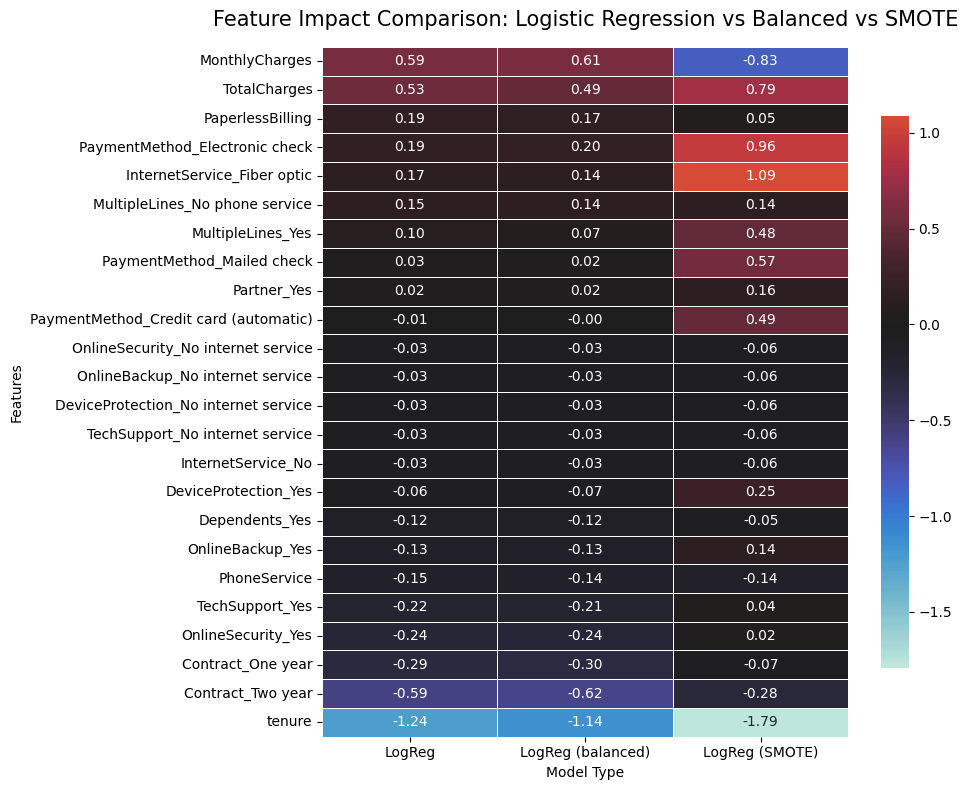

In [25]:
plt.figure(figsize=(10, 8))

sns.heatmap(features_impacts.sort_values('LogReg', ascending=False),
            annot=True, fmt='.2f', 
            center=0, linewidths=0.5, cbar_kws={'shrink': 0.8})

plt.title("Feature Impact Comparison: Logistic Regression vs Balanced vs SMOTE", fontsize=15, pad=15)
plt.ylabel("Features")
plt.xlabel("Model Type")
plt.tight_layout()

fig_path = "/kaggle/working/figures/"
os.makedirs(fig_path, exist_ok=True)
plt.savefig(fig_path+"heatmap_feature_importance.png", 
            dpi=200, bbox_inches='tight')
plt.show()